# BENCHMARKS

In [25]:
from pandas.core.interchange.dataframe_protocol import DataFrame
from gca.automaton.cagwo import CAGWO
from gca.algorithms.gwo import GWO
from gca.project_types import ObjFunc
from gca.benchmarks.benchmark_functions import (
    F1, F2, F3, F4,
    F5, F6, F7, F8, F9,
    FunctionRecord
)

population: int = 30

def cagwo_provider(
    obj_function: ObjFunc,
    dimension: int,
    lower_bound: tuple[float, ...],
    upper_bound: tuple[float, ...],
    iterations: int
) -> CAGWO:
    return CAGWO(population, obj_function, dimension, LSHNeighborMap(dimension),
                 lower_bound, upper_bound, iterations)

def gwo_provider(
    obj_function: ObjFunc,
    dimension: int,
    lower_bound: tuple[float, ...],
    upper_bound: tuple[float, ...],
    iterations: int
) -> GWO:
    return GWO(population, obj_function, dimension, lower_bound, upper_bound, iterations)

In [26]:
from gca.benchmarks.benchmark_tools import run_metaheuristic_benchmark, MetaHeuristicBenchmark, to_dataframe
from gca.components.neighbormap import LSHNeighborMap

obj_functions: tuple[FunctionRecord, ...] = tuple([F1, F2, F3, F4, F5, F6, F7, F8, F9])
results_cagwo: MetaHeuristicBenchmark = run_metaheuristic_benchmark(
    "CAGWO", cagwo_provider, obj_functions, 2, 200)
results_gwo = MetaHeuristicBenchmark = run_metaheuristic_benchmark(
    "GWO", gwo_provider, obj_functions, 2, 200)

cagwo_df: DataFrame = to_dataframe(results_cagwo)
gwo_df: DataFrame = to_dataframe(results_gwo)

print("CAGWO STATS")
print(cagwo_df)
print("GWO STATS")
print(gwo_df)

CAGWO STATS
  Function  Dimension  LowerBound  UpperBound           AVG           STD  \
0       F1         30      -10.00       10.00  1.687508e-28  1.677439e-28   
1       F2         30     -100.00      100.00  0.000000e+00  0.000000e+00   
2       F3         30       -1.28        1.28  8.782657e-03  3.803639e-03   
3       F4         30      -32.00       32.00  3.996803e-15  0.000000e+00   
4       F5         30       -5.12        5.12  0.000000e+00  0.000000e+00   
5       F6         30     -500.00      500.00 -5.410209e+03  3.605643e+03   
6       F7         30     -600.00      600.00  0.000000e+00  0.000000e+00   
7       F8         30      -10.00       10.00  7.611359e-12  3.589370e-12   
8       F9         30      -10.00       10.00 -6.497919e+00  1.366791e+00   

         MEDIAN           MIN           MAX  
0  1.687508e-28  1.006917e-30  3.364947e-28  
1  0.000000e+00  0.000000e+00  0.000000e+00  
2  8.782657e-03  4.979018e-03  1.258630e-02  
3  3.996803e-15  3.996803e-15  3.

### CONVERGENCE

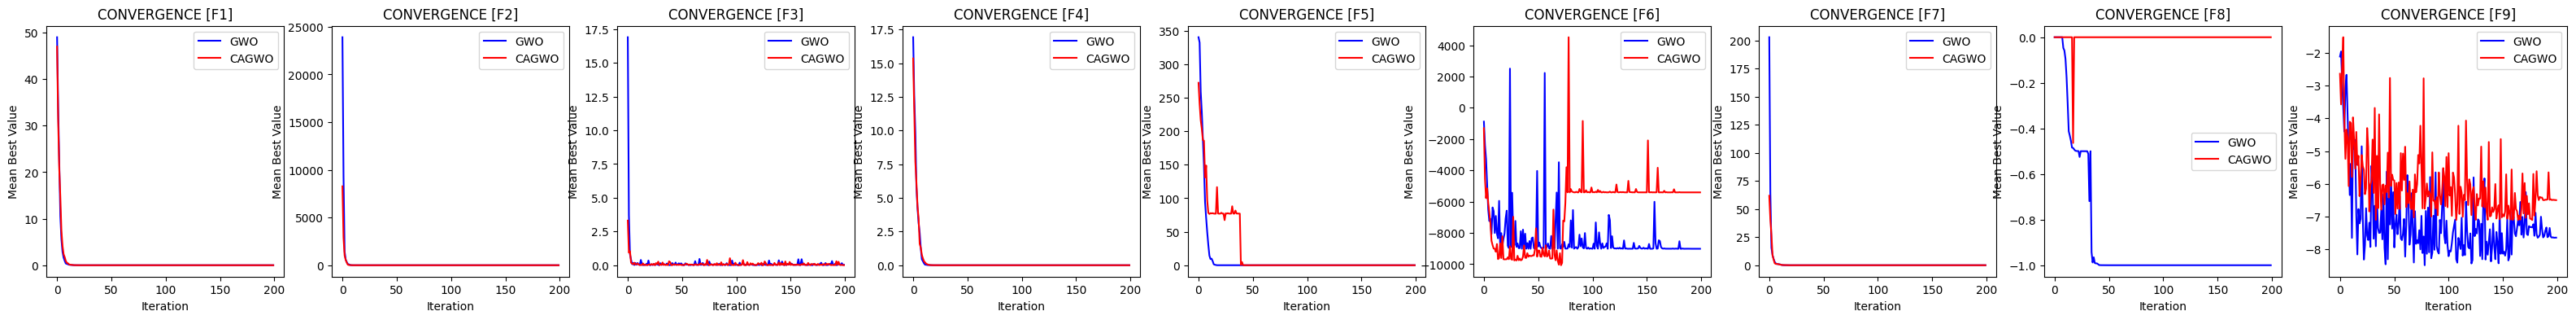

In [27]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, len(results_gwo.functions_benchmarks), figsize=(40, 4))

for i, (cagwo_func_benchmark, gwo_func_benchmark) in enumerate(zip(
        results_cagwo.functions_benchmarks, results_gwo.functions_benchmarks)):

    min_y = min(min(cagwo_func_benchmark.solutions_avg_per_iteration),
                min(gwo_func_benchmark.solutions_avg_per_iteration))
    max_y = max(max(cagwo_func_benchmark.solutions_avg_per_iteration),
                max(gwo_func_benchmark.solutions_avg_per_iteration))

    ax[i].set(
        #xlim=(0, results_gwo.iterations),
        #ylim=(min_y, max_y),
        title=f"CONVERGENCE [{results_gwo.functions_benchmarks[i].function.name}]",
        xlabel="Iteration",
        ylabel="Mean Best Value"
    )

    ax[i].plot(range(results_gwo.iterations), gwo_func_benchmark.solutions_avg_per_iteration, color="blue", label="GWO")
    ax[i].plot(range(results_cagwo.iterations), cagwo_func_benchmark.solutions_avg_per_iteration, color="red", label="CAGWO")
    ax[i].legend()

plt.show()